In [149]:
from bs4 import BeautifulSoup
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import re
import requests

## Inicializando variáveis e carregando carteira

In [172]:
url = 'https://conteudos.xpi.com.br/acoes/'
regex = r"\d*,\d*"
today = date.today().strftime("%d/%m/%Y")
index = 0
rentability_analysis = {}

try:
    stocks = pd.read_csv('stocks.csv')
except FileNotFoundError:
    stocks = pd.DataFrame(columns=['date', 'code', 'price'])

In [169]:
stock_list = stocks['code'].unique().tolist()
stock_list

['vale3', 'mglu3']

## Recebendo dados atuais

In [170]:
for item in stock_list:
    r = requests.get(url + item)
    soup = BeautifulSoup(r.text, 'html.parser')
    current_price = soup.select('.dados-produto li')[0].get_text()
    current_price = re.findall(regex, current_price)[0]
    current_price = re.sub(r',', '.', current_price)
    stocks = stocks.append({
        'date': today,
        'code': item,
        'current_price': float(current_price)
    }, ignore_index=True)

## Cálculo de rentabilidade
A rentabilidade é exibida em dados percentuais.

In [180]:
for element in stock_list:
    start_date = min(stocks[stocks['code'] == element]['date'])
    end_date = max(stocks[stocks['code'] == element]['date'])
    
    start_price = stocks[(stocks['date'] == start_date) & (stocks['code'] == element)]['current_price'].values[0]
    end_price = stocks[(stocks['date'] == end_date) & (stocks['code'] == element)]['current_price'].values[0]
    rentability = ((end_price/start_price) - 1) * 100
    
    rentability_analysis[element] = rentability

display(rentability_analysis)

{'vale3': 3.276402927849409, 'mglu3': 1.2060301507537563}

## Visualização

Ação: VALE3
Rentabilidade total: 3.28%


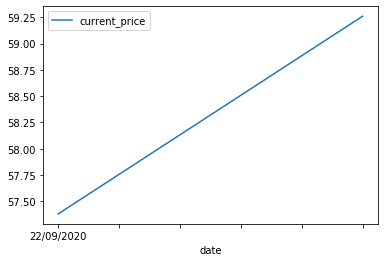

Ação: MGLU3
Rentabilidade total: 1.21%


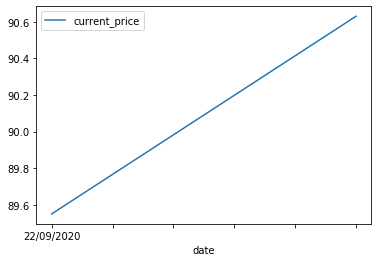

In [159]:
for element in stock_list:
    print(f'Ação: {element.upper()}')
    print(f'Rentabilidade total: {rentability_analysis[element]:.2f}%')
    stocks[stocks['code'] == element].plot(x='date', y='current_price')
    plt.show()

## Salva resultados

In [ ]:
stocks.to_csv('stocks.csv', index=False)